## Data in-set and Preprocessing

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVC
from termcolor import colored
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import seaborn as sns

def prRed(skk): print("\033[1m \033[91m {}\033[00m" .format(skk)) 
def prGreen(skk): print("\033[1m \033[92m {}\033[00m" .format(skk)) 
def prYellow(skk): print("\033[1m \033[93m {}\033[00m" .format(skk)) 
def prBlack(skk): print("\033[1m \033[98m {}\033[00m" .format(skk)) 

In [5]:
corolla = pd.read_csv('ToyotaCorolla_kaggle.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,NaN,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,NaN,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


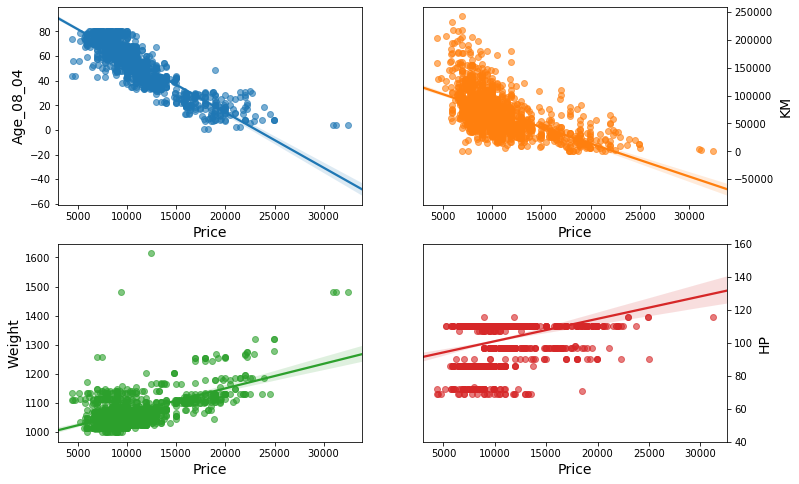

In [10]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age_08_04', data = corolla, scatter_kws={'alpha':0.6}, ax = axes[0,0])
axes[0,0].set_xlabel('Price', fontsize=14)
axes[0,0].set_ylabel('Age_08_04', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.regplot(x = 'Price', y = 'KM', data = corolla, scatter_kws={'alpha':0.6}, ax = axes[0,1])
axes[0,1].set_xlabel('Price', fontsize=14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.regplot(x = 'Price', y = 'Weight', data = corolla, scatter_kws={'alpha':0.6}, ax = axes[1,0])
axes[1,0].set_xlabel('Price', fontsize=14)
axes[1,0].set_ylabel('Weight', fontsize=14)

sns.regplot(x = 'Price', y = 'HP', data = corolla, scatter_kws={'alpha':0.6}, ax = axes[1,1])
axes[1,1].set_xlabel('Price', fontsize=14)
axes[1,1].set_ylabel('HP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()
axes[1,1].set(ylim=(40,160))

plt.show()

NameError: name 'dataset' is not defined

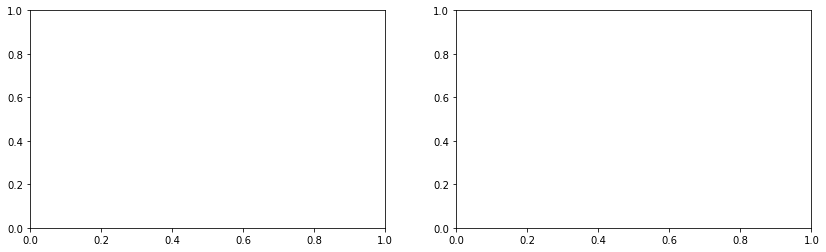

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['KM'], ax = axes[0])
axes[0].set_xlabel('KM', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'Price', y = 'KM', data = dataset, ax = axes[1])
axes[1].set_xlabel('Price', fontsize=14)
axes[1].set_ylabel('KM', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

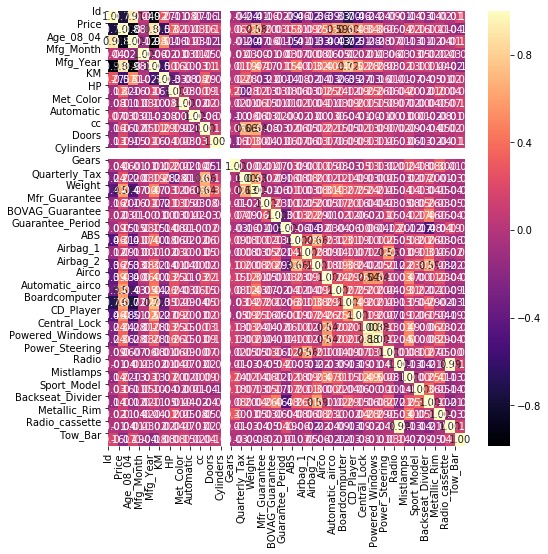

In [7]:
corr = corolla.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

##### We have null values in these columns - 'HP' , 'cc' , 'Doors', 'Cylinders', 'Gears', 'Weight'. )

In [6]:
corolla.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1366 non-null float64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1385 non-null float64
Doors               1424 non-null float64
Cylinders           1398 non-null float64
Gears               1418 non-null float64
Quarterly_Tax       1436 non-null int64
Weight              1431 non-null float64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64

##### To impute null values, best categorical column to groupby would be 'Fuel_type'

In [7]:
g_corolla = corolla.groupby(['Fuel_Type'])
g_corolla.first()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
CNG,191,TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-...,7750,43,2,2001,178858,110.0,0,0,...,0,0,1,1,0,0,1,0,1,0
Diesel,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90.0,1,0,...,1,1,1,0,0,0,1,0,0,0
Petrol,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,192.0,0,0,...,1,1,1,1,0,0,0,1,1,0


In [8]:
g1_corolla = g_corolla.transform(lambda grp: grp.fillna(grp.mean()))

In [9]:
g1_corolla

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,78.306452,1,0,2000.0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,78.306452,1,0,2000.0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90.000000,1,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,90.000000,0,0,2000.0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,90.000000,0,0,2000.0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,86.000000,1,0,1300.0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,1998,19000,86.000000,0,0,1300.0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,1998,17016,86.000000,0,0,1300.0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,1998,16916,86.000000,1,0,1300.0,...,0,0,0,0,0,0,1,0,0,0


##### Group transformation with mean values in the above 6 columns

In [10]:
g1_corolla['HP']=(g_corolla['HP'].apply(lambda grp:grp.fillna(grp.mean())))

In [11]:
g1_corolla['cc']=(g_corolla['cc'].apply(lambda grp:grp.fillna(grp.mean())))


In [12]:
g1_corolla['Doors']=(g_corolla['Doors'].apply(lambda grp:grp.fillna(grp.median())))


In [13]:
g1_corolla['Cylinders']=(g_corolla['Cylinders'].apply(lambda grp:grp.fillna(grp.median())))


In [14]:
g1_corolla['Gears']=(g_corolla['Gears'].apply(lambda grp:grp.fillna(grp.median())))


In [15]:
g1_corolla['Weight']=(g_corolla['Weight'].apply(lambda grp:grp.fillna(grp.mean())))


In [16]:

#del(g1_corolla)

In [17]:
#cor_dum = pd.get_dummies(g1_corolla['Fuel_Type'])
g1_corolla= pd.concat([g1_corolla,corolla['Fuel_Type']], axis=1)


In [18]:
g1_corolla = pd.get_dummies(g1_corolla)

In [19]:
y1 = g1_corolla['Price']

In [20]:
g1_corolla.drop('Price', axis=1, inplace=True) #Since it's target variable

In [21]:
g1_corolla.head()

,Id,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,23,10,2002,46986,78.306452,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
1,2,23,10,2002,72937,78.306452,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,3,24,9,2002,41711,90.000000,1,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
3,4,26,7,2002,48000,90.000000,0,0,2000.0,3.0,...,0,0,0,1,0,0,0,0,1,0
4,5,30,3,2002,38500,90.000000,0,0,2000.0,3.0,...,0,1,0,1,0,0,0,0,1,0


In [22]:
#Selected Standardscaler because of high variance and size of the data

In [108]:
X_train_org, X_test_org, y_train, y_test = train_test_split(g1_corolla,y1,test_size=0.25, random_state=0)

In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [132]:
mm = MinMaxScaler()
X_train1 = mm.fit_transform(X_train_org)
X_test1  = mm.transform(X_test_org)


##### LINEAR REGRESSION

In [3]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

prRed("\nLINEAR REGRESSION")
lreg_score_train = lreg.score(X_train, y_train)
lreg_score_test = lreg.score(X_test, y_test)
print("\nTrain score -->",lreg_score_train)
print("Test score  -->",lreg_score_test)
y_pred_test = lreg.predict(X_test)
rmse_lreg = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LREG   -->",rmse_lreg)

NameError: name 'X_train' is not defined

Data is linearly correlated!


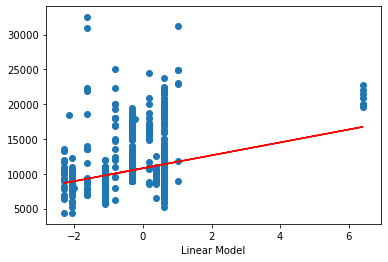

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('Linear Model')
print("Data is linearly correlated!")


##### RIDGE REGRESSION

In [118]:
#RIDGE
ridge_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]}
#We can build Grid Search model using the above parameters. 

grid_search = GridSearchCV(linear_model.Ridge(random_state=0), ridge_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
prRed("\nRIDGE REGRESSION")
print("\nBest tuning parameter from grid search -->" ,grid_search.best_params_)

ridge_score_train = grid_search.score(X_train,y_train)
ridge_score_test = grid_search.score(X_test,y_test)
print("\nTrain score -->", ridge_score_train)
print("Test score  -->", ridge_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE RIDGE  -->",rmse_ridge)
#Cross validation for mean score
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(grid_search,X_train,y_train,cv=5))
    test_scores.append(cross_val_score(grid_search,X_test,y_test,cv=5))
prRed('\nRIDGE CROSS VALIDATION')   
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

  
RIDGE REGRESSION

Best tuning parameter from grid search --> {'alpha': 15}

Train score --> 0.9222947655705667
Test score  --> 0.8607115902341018
RMSE RIDGE  --> 1613772.962108366
  
RIDGE CROSS VALIDATION

Mean Train score --> 0.9021649312239741
Mean Test score  --> 0.8535671070335213


#####  LASSO REGRESSION

In [120]:
#LASSO
lasso_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]}
#We can build Grid Search model using the above parameters. 

grid_search = GridSearchCV(linear_model.Lasso(random_state=0), lasso_params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
prGreen("\nLASSO REGRESSION")
print("Best tuning parameter from grid search -->" ,grid_search.best_params_)

lasso_score_train = grid_search.score(X_train,y_train) 
lasso_score_test = grid_search.score(X_test,y_test)
print("\nTrain score -->",lasso_score_train)
print("Test score  -->", lasso_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE LASSO  -->",rmse_ridge)
#Cross validation for mean score
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(grid_search,X_train,y_train,cv=5))
    test_scores.append(cross_val_score(grid_search,X_test,y_test,cv=5))
prGreen("\nLASSO CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))



  
LASSO REGRESSION
Best tuning parameter from grid search --> {'alpha': 5}

Train score --> 0.9226428967793625
Test score  --> 0.8607577924837642
RMSE LASSO  --> 1613772.962108366
  
LASSO CROSS VALIDATION

Mean Train score --> 0.9005522650628397
Mean Test score  --> 0.85397885798202




##### POLYNOMIAL REGRESSION


In [91]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
poly_grid.fit(X_train, y_train)

print("Best degree -->",poly_grid.best_params_['polynomialfeatures__degree'])
print("Best score -->",poly_grid.best_score_)

    

1
0.8993889610534556


In [124]:
y_pred_poly_test = poly_grid.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_pred_poly_test, y_test)**2)
print("RMSE POLY  -->",rmse_poly)

RMSE POLY  --> 1595711.7104081872


In [ ]:
poly_train_score = []
poly_test_score =[]
poly_train_score.append(cross_val_score(poly_grid,X_train,y_train,cv=5))

In [97]:
poly_test_score.append(cross_val_score(poly_grid,X_test,y_test,cv=5))

In [98]:
prRed("\nPOLYNOMIAL CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(poly_train_score))
print("Mean Test score  -->",np.mean(poly_test_score))

  
POLYNOMIAL CROSS VALIDATION

Mean Train score --> 0.1432441380566148
Mean Test score  --> -8003974441832237.0



##### KNN Regressor

In [128]:
k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)
#print (param_grid)
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv = 5)
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_estimator_)

knn_reg = KNeighborsRegressor(grid.best_params_['n_neighbors'])
knn_reg.fit(X_train, y_train)
knn_reg_train_score=knn_reg.score(X_train, y_train)
knn_reg_test_score= knn_reg.score(X_test, y_test)
y_pred_test = knn_reg.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE kNN Regressor  -->",rmse_knn)
for k in k_range:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(KNeighborsRegressor(k),X_train,y_train,cv=5))
    test_scores.append(cross_val_score(KNeighborsRegressor(k),X_test,y_test,cv=5))
prRed("\nkNN REGRESSOR CROSS VALIDATION")      
print("\nMean Train score -->",np.mean(train_scores))
print("Mean Test score  -->",np.mean(test_scores))

{'n_neighbors': 5}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
RMSE kNN Regressor  --> 2105639.037325905
  
kNN REGRESSOR CROSS VALIDATION

Mean Train score --> 0.850186445023709
Mean Test score  --> 0.7247807057226522


##### SUPPORT VECTOR REGRESSION

In [6]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'kernel':('linear', 'rbf','poly')}

In [7]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True, n_jobs=5)
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [152]:
prRed("\nSUPPORT VECTOR REGRESSION")
print("Best parameters: {}".format(grid_search.best_params_))
svm_score_train = grid_search.score(X_train,y_train)
svm_score_test = grid_search.score(X_test,y_test)

print("\nTrain score   -->" ,svm_score_train )
print("Test score    -->", svm_score_test)
y_pred_test = grid_search.predict(X_test)
rmse_svm = np.sqrt(mean_squared_error(y_pred_test, y_test)**2)
print("RMSE SVM Reg  -->",rmse_svm)

  
SUPPORT VECTOR REGRESSION
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

Train score   --> 0.9178746679390967
Test score    --> 0.8452259609878063
RMSE SVM Reg  --> 1793186.9551384198


In [2]:
Models1= [('Linear ', lreg_score_train, lreg_score_test, rmse_lreg),
          ('Ridge ', ridge_score_train, ridge_score_test, rmse_ridge),
          ('Lasso ', lasso_score_train, lasso_score_test, rmse_lasso),
          ('Polynomial ', poly_score_train, poly_score_test, rmse_poly),
          ('kNN ', knn_reg_train_score, knn_reg_test_score, rmse_knn),
          ('SVM ', svm_score_train, svm_score_test, rmse_svm)]

NameError: name 'lreg_score_train' is not defined

In [ ]:
print('Linear regression score is much more than other models.')

In [ ]:
print ( " ")

In [ ]:
stats = pd.DataFrame(data = Models1, columns = ['Models', 'Score_Train', 'Score_Test', 'RMSE'])
print("\n",stats)


In [4]:
prGreen(stats.loc[stats['Score_Test'].idxmax()])

NameError: name 'stats' is not defined

#### Best model found is Linear regression.